In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from cross_validate import CrossValidation
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

# Seed the random number generator:
np.random.seed(1)

In [2]:
# Load data
x_train = pickle.load(open("x_train.p", "rb"))
y_train = pickle.load(open("y_train.p", "rb"))
x_test = pickle.load(open("x_test.p", "rb"))
labels = pickle.load(open("word_labels.p", "rb"))

In [3]:
def eval_tree_based_model_max_depth(max_depth, estimators, k_fold_cross_validation, X_train, y_train):
    accuracies = []
    print("Running Random Forest classifier decision tree with max depth: " 
              + str(max_depth))
    print("and fold cross validation of: " + str(k_fold_cross_validation))
    cross_validated_data = CrossValidation(X_train, y_train, k_fold_cross_validation)
    for i in range(k_fold_cross_validation):
    
        X_train, y_train = cross_validated_data.get_other_partitions(i)
        x_test, y_test = cross_validated_data.get_partition(i)
        clf = RandomForestClassifier(n_estimators = estimators, max_depth = max_depth, criterion='gini')
        
        clf.fit(X_train, y_train)
        accuracies.append(clf.score(x_test,y_test))
    average_accuracy = np.mean(accuracies)
    print("Average accuracy was " + str(average_accuracy))
    return average_accuracy


In [6]:
n_estimators = 100

#clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 21)
scores = []
best_depth = -1
best_score = 0

for depth in max_depth:
    acc = eval_tree_based_model_max_depth(depth, n_estimators, 10, x_train, y_train)
    scores.append(acc)
    print("")
    if (acc > best_score):
        best_depth = depth
        best_score = acc
    #plt.figure()
    #plt.plot(max_depth, acc, label='Average Accuracy')
    #plt.xlabel('Maximum Depth')
    #plt.ylabel('Average Accuracy')
    #plt.title('Random Forest with Gini Impurity and Maximum Depth')
    #plt.legend(loc=0, shadow=True, fontsize='x-large')
    #plt.show()

#print('Accuracy maximized at max_depth = %i' % max_depth[np.argmax(acc)])

print("best depth: " + str(best_depth))
print("best score: " + str(best_score))

Running Random Forest classifier decision tree with max depth: 2
and fold cross validation of: 10
Average accuracy was 0.7458

Running Random Forest classifier decision tree with max depth: 3
and fold cross validation of: 10
Average accuracy was 0.7652500000000001

Running Random Forest classifier decision tree with max depth: 4
and fold cross validation of: 10
Average accuracy was 0.7761500000000001

Running Random Forest classifier decision tree with max depth: 5
and fold cross validation of: 10
Average accuracy was 0.7786

Running Random Forest classifier decision tree with max depth: 6
and fold cross validation of: 10
Average accuracy was 0.7862000000000001

Running Random Forest classifier decision tree with max depth: 7
and fold cross validation of: 10
Average accuracy was 0.79145

Running Random Forest classifier decision tree with max depth: 8
and fold cross validation of: 10
Average accuracy was 0.7918499999999999

Running Random Forest classifier decision tree with max depth:

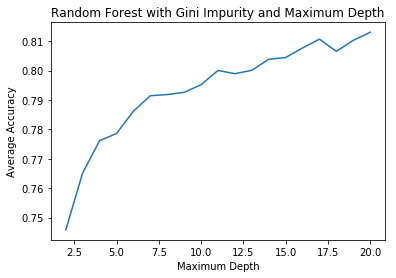

In [7]:
plt.figure()
plt.plot(max_depth, scores, label='Average Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Average Accuracy')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
#plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()